In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# white = 0, red = 1
white['label'] = np.int(0)

red['label'] = np.int(1)

In [5]:
data = pd.concat([white,red], ignore_index=True, sort=False)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [6]:
data.shape

(6497, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  label                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [8]:
# data types
data.dtypes.value_counts()

float64    11
int64       2
dtype: int64

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
label                   0.0
dtype: float64

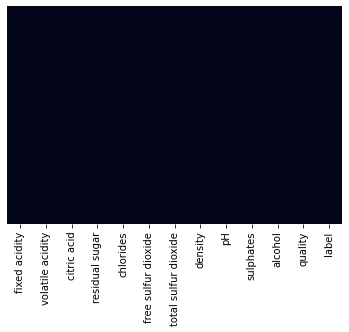

In [10]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

data.isnull().sum()/len(data)*100

## EDA

### Univariate Analysis

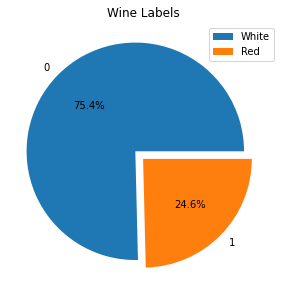

In [11]:
plt.figure(figsize=(10,5))

plt.pie(data['label'].value_counts().values, 
        explode = (0.1,0),
        autopct = '%0.1f%%',
        labels = data['label'].value_counts().index)

plt.title('Wine Labels')
plt.legend(['White', 'Red'])
plt.show()

- there is an unbalance within the labels, need to stratify later.

In [12]:
# unique values
data.apply(lambda x:x.unique())

fixed acidity           [7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, ...
volatile acidity        [0.27, 0.3, 0.28, 0.23, 0.32, 0.22, 0.18, 0.16...
citric acid             [0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37...
residual sugar          [20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1.2...
chlorides               [0.045, 0.049, 0.05, 0.057999999999999996, 0.0...
free sulfur dioxide     [45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16....
total sulfur dioxide    [170.0, 132.0, 97.0, 186.0, 136.0, 129.0, 63.0...
density                 [1.001, 0.9940000000000001, 0.9951, 0.9956, 0....
pH                      [3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14,...
sulphates               [0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63...
alcohol                 [8.8, 9.5, 10.1, 9.9, 9.6, 11.0, 12.0, 9.7, 10...
quality                                             [6, 5, 7, 8, 4, 3, 9]
label                                                              [0, 1]
dtype: object

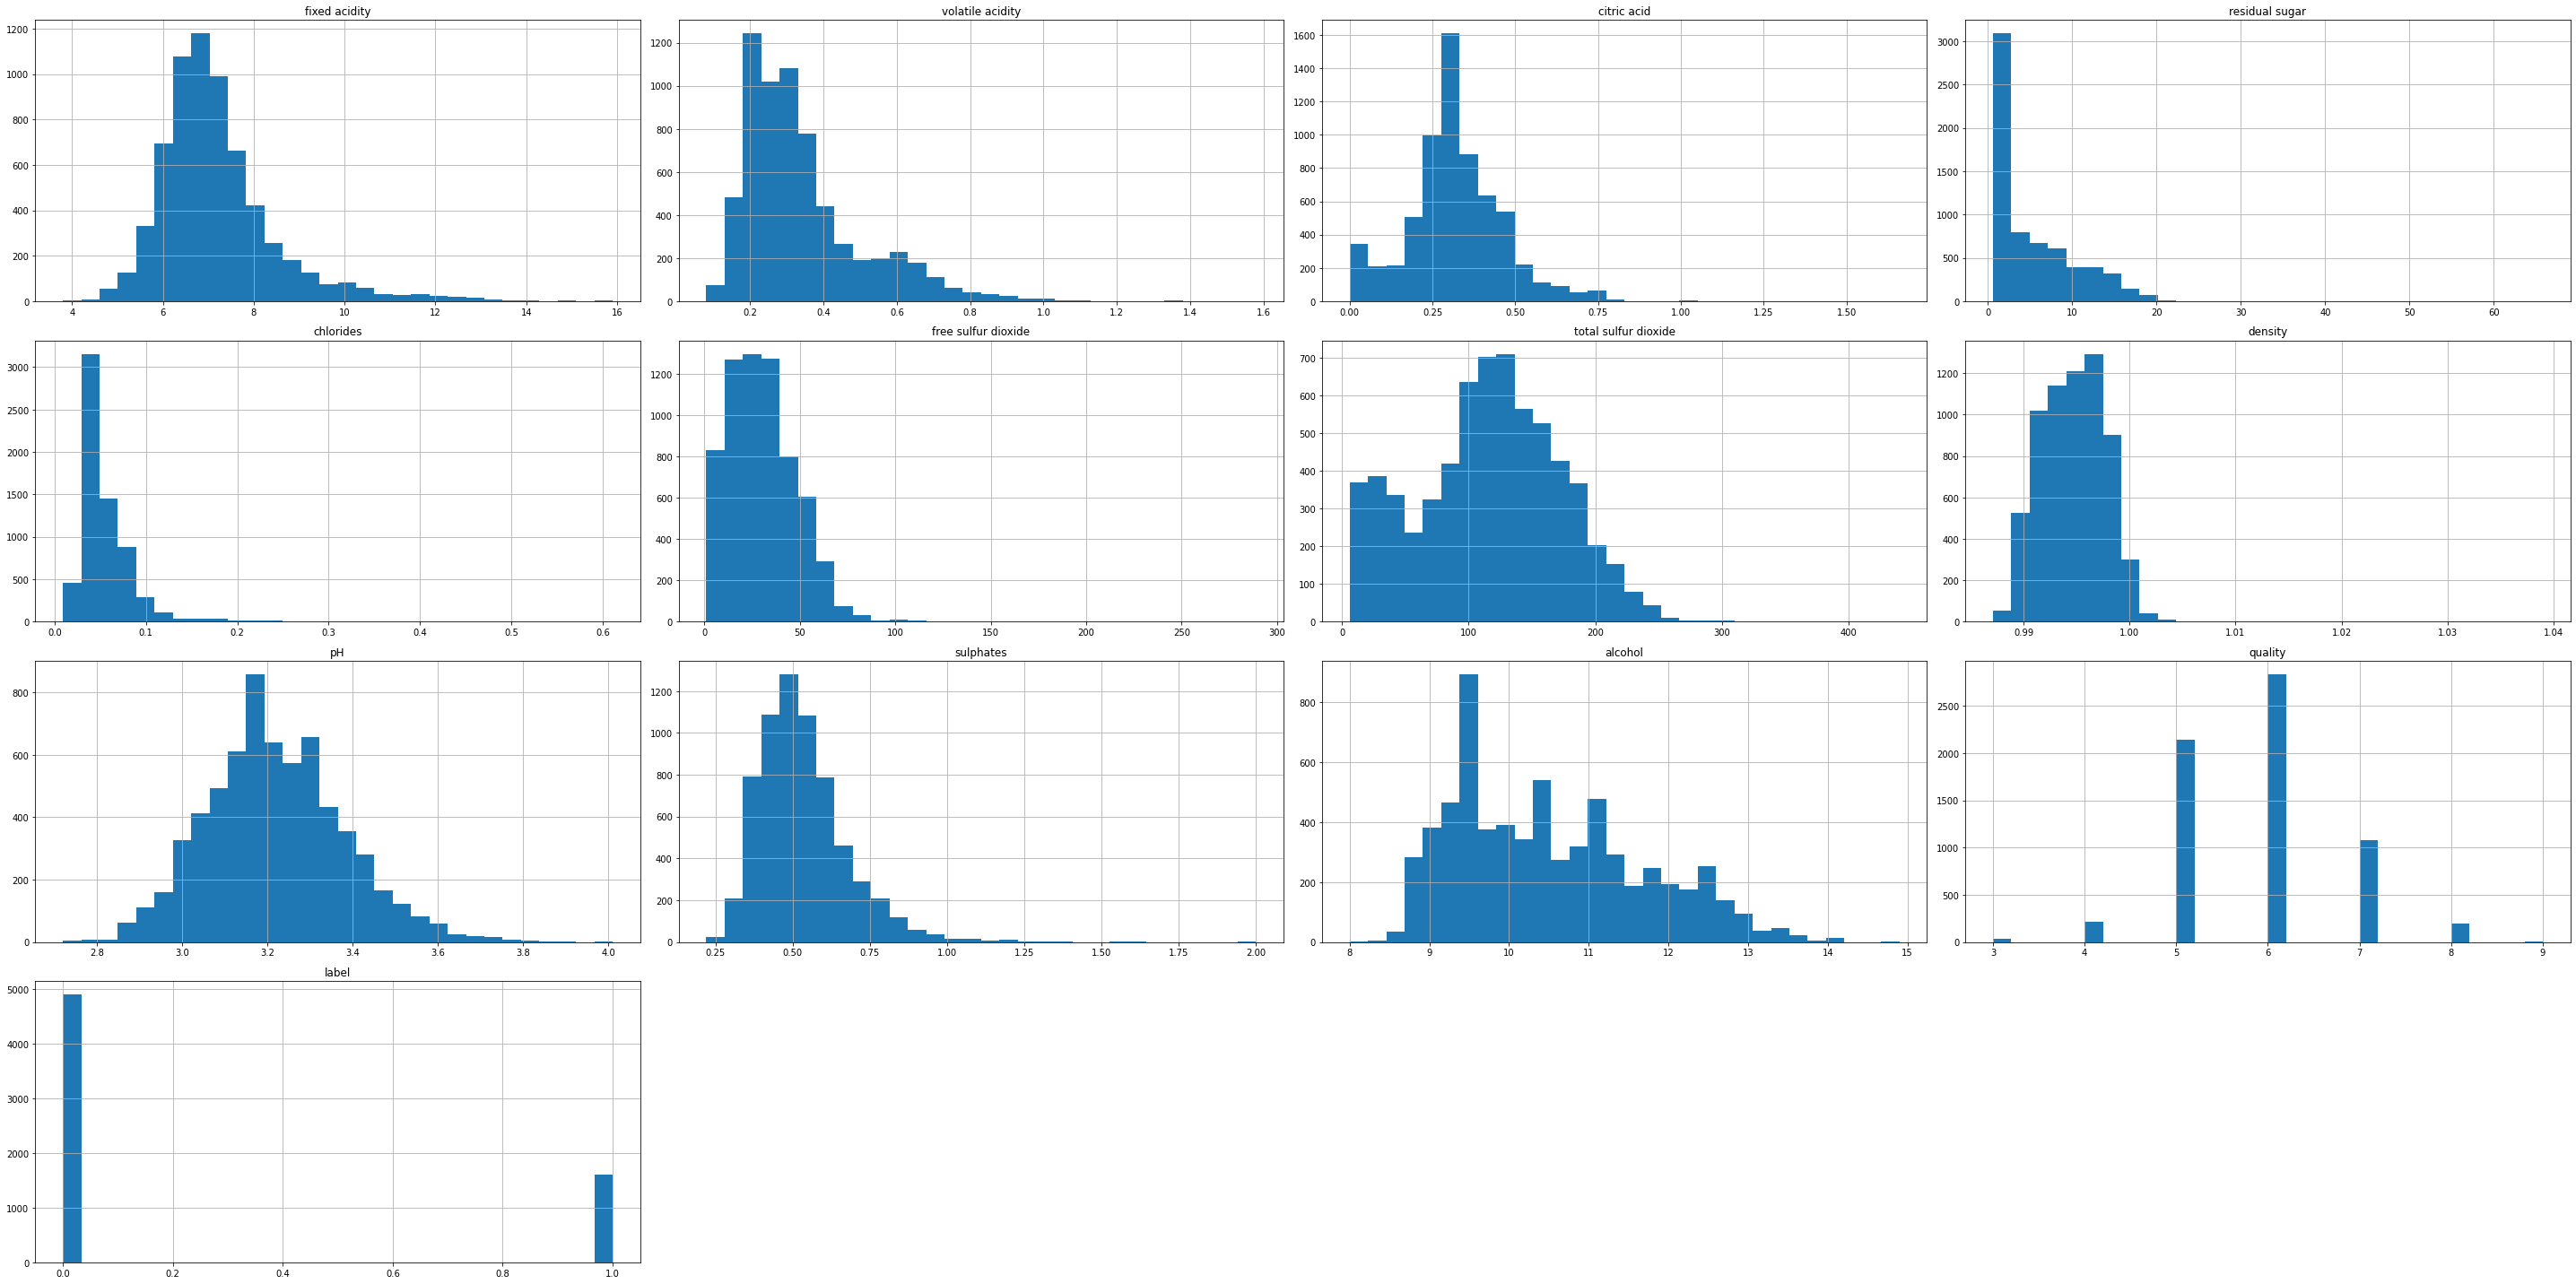

In [13]:
data.hist(bins=30, figsize=(40,20))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='label', ylabel='citric acid'>

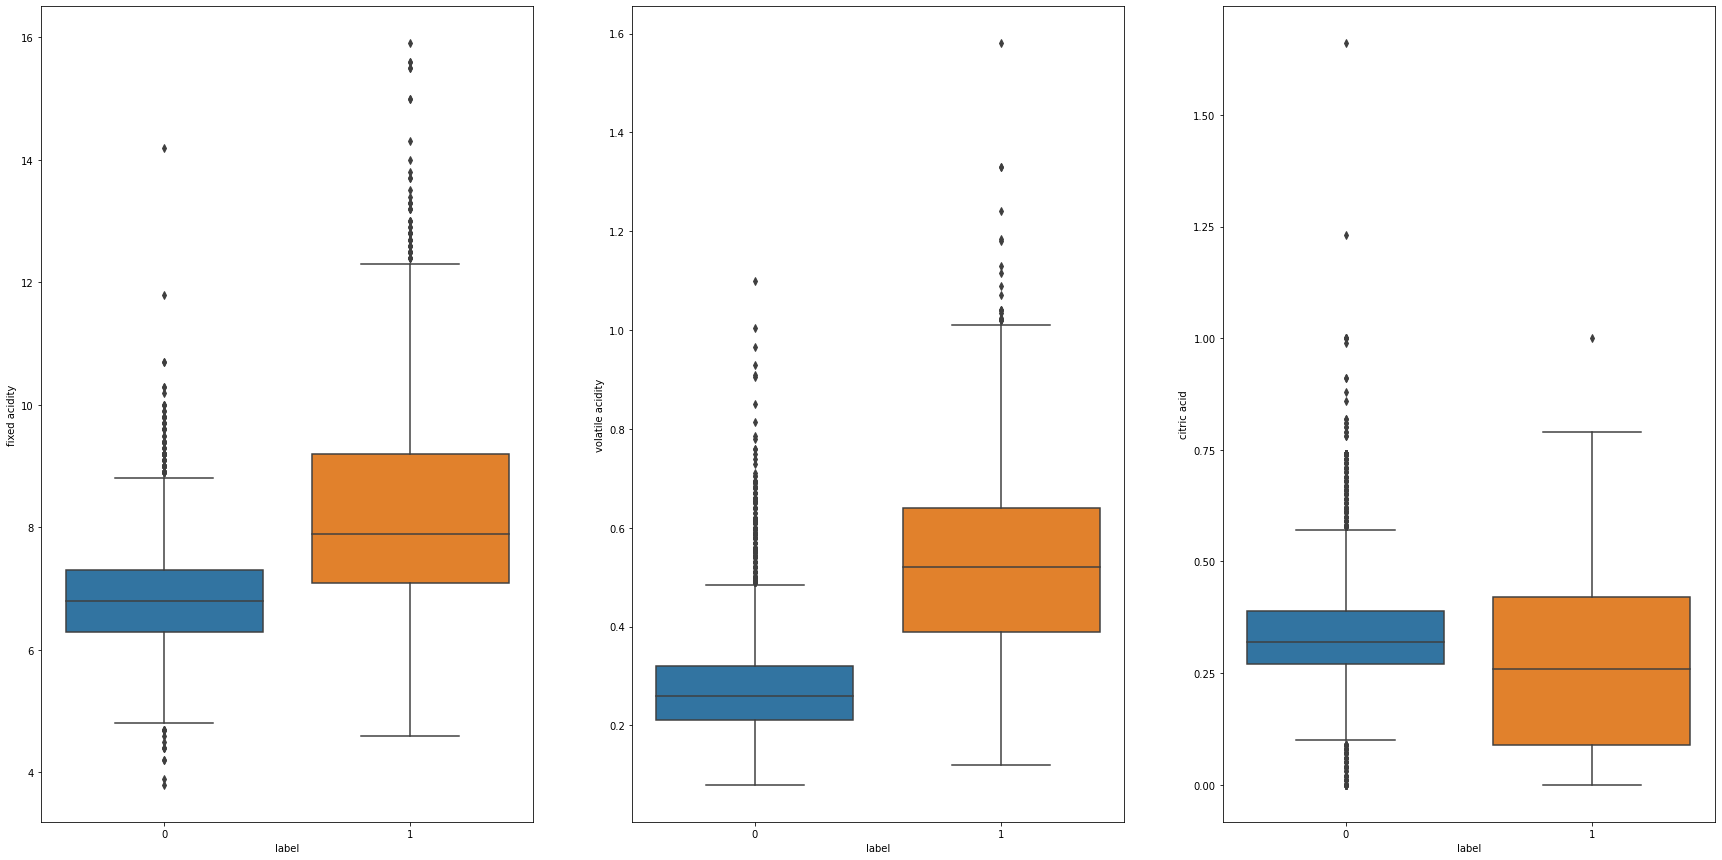

In [14]:
fig, axes = plt.subplots(1,3, figsize=(30,15))

sns.boxplot(x='label', y='fixed acidity', data=data, ax=axes[0],)
sns.boxplot(x='label', y='volatile acidity', data=data, ax=axes[1])
sns.boxplot(x='label', y='citric acid', data=data, ax=axes[2])

- red wine have a higher fixed acidity and volatile acidity.
- white wine have more citric acid compared to red wine.

<AxesSubplot:xlabel='label', ylabel='density'>

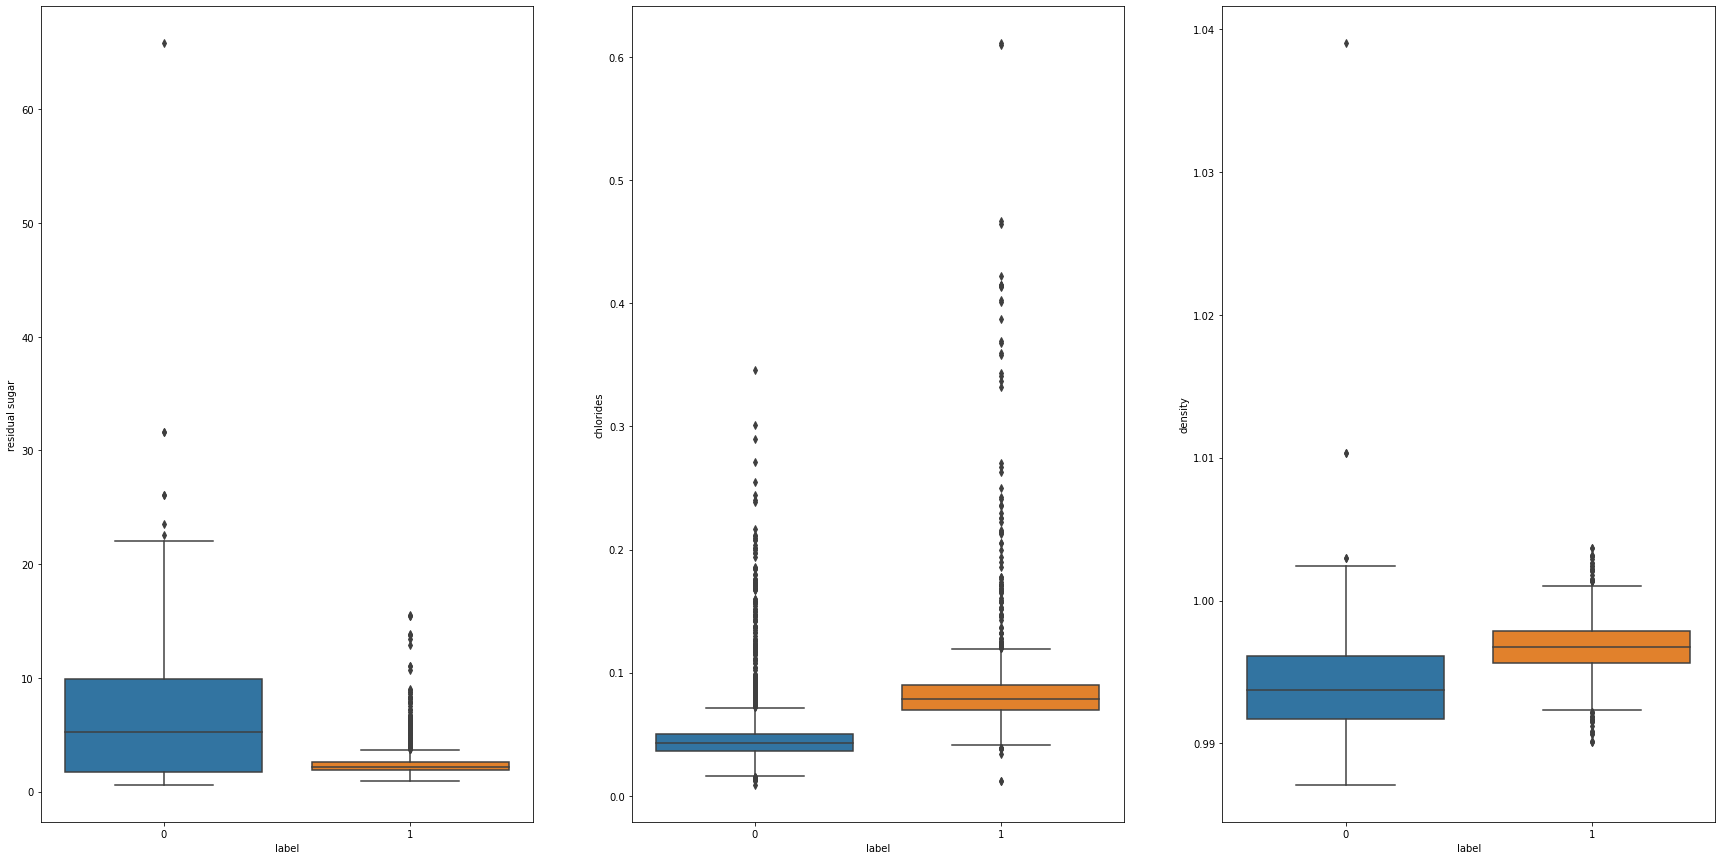

In [15]:
fig, axes = plt.subplots(1,3, figsize=(30,15))

sns.boxplot(x='label', y='residual sugar', data=data, ax=axes[0],)
sns.boxplot(x='label', y='chlorides', data=data, ax=axes[1])
sns.boxplot(x='label', y='density', data=data, ax=axes[2])

- white wine have more residual sugar compared to red wine.
- red wine has more calories and is denser compared to white wine.

<AxesSubplot:xlabel='label', ylabel='sulphates'>

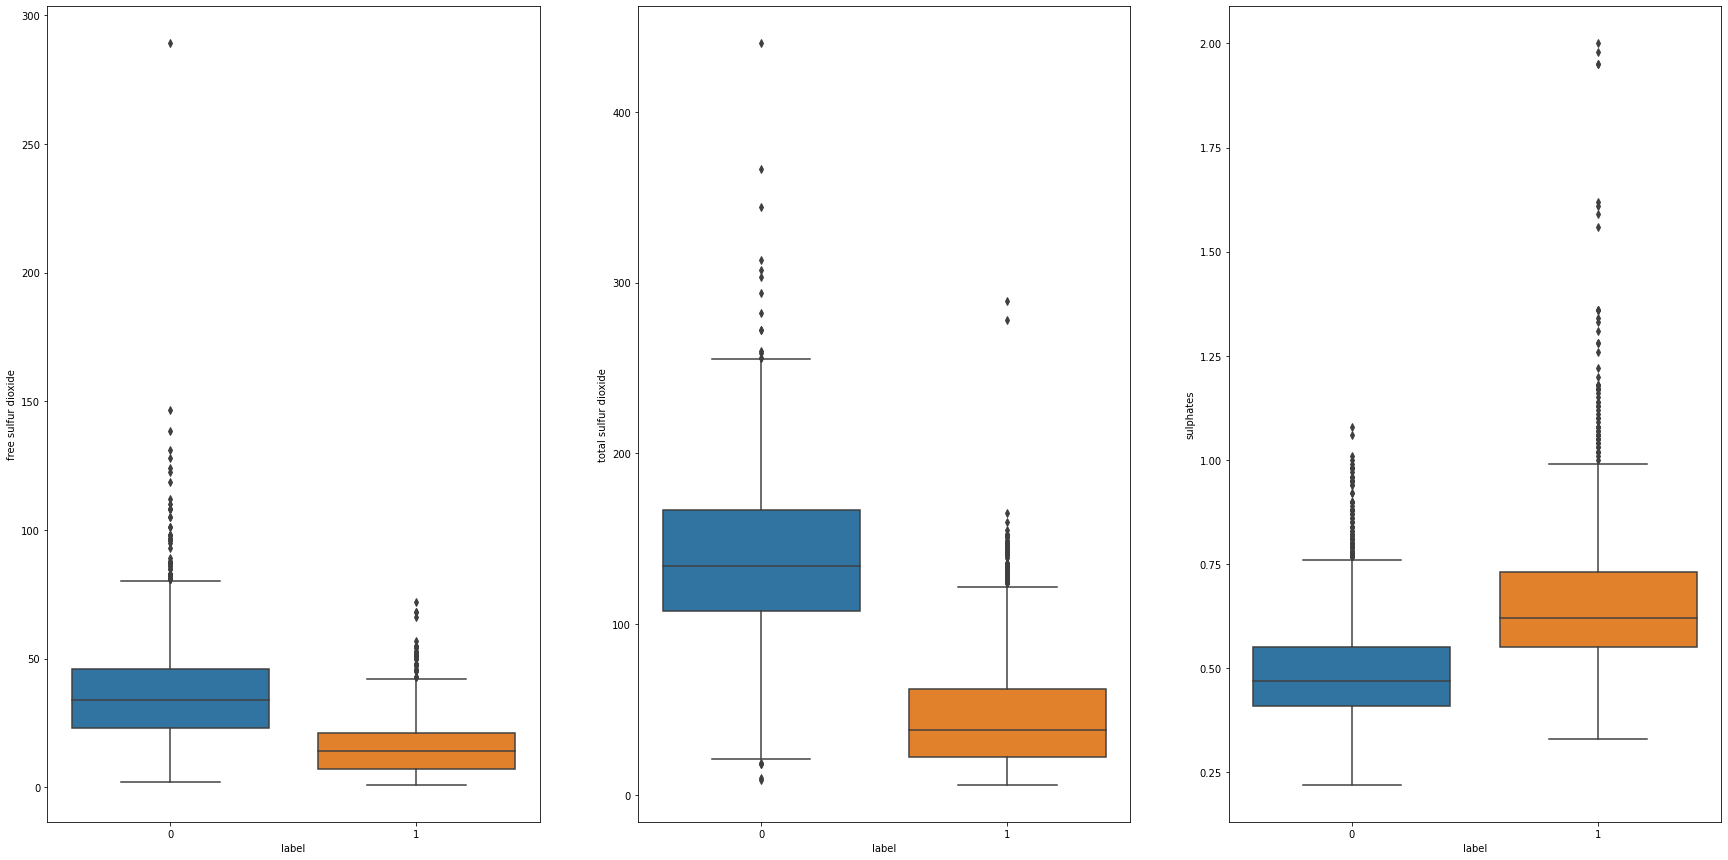

In [16]:
fig, axes = plt.subplots(1,3, figsize=(30,15))

sns.boxplot(x='label', y='free sulfur dioxide', data=data, ax=axes[0],)
sns.boxplot(x='label', y='total sulfur dioxide', data=data, ax=axes[1])
sns.boxplot(x='label', y='sulphates', data=data, ax=axes[2])

- white wine have more free sulfur dioxide and total sulfur dioxide.
- red wine have more sulphates compared to white wine.

<AxesSubplot:xlabel='label', ylabel='quality'>

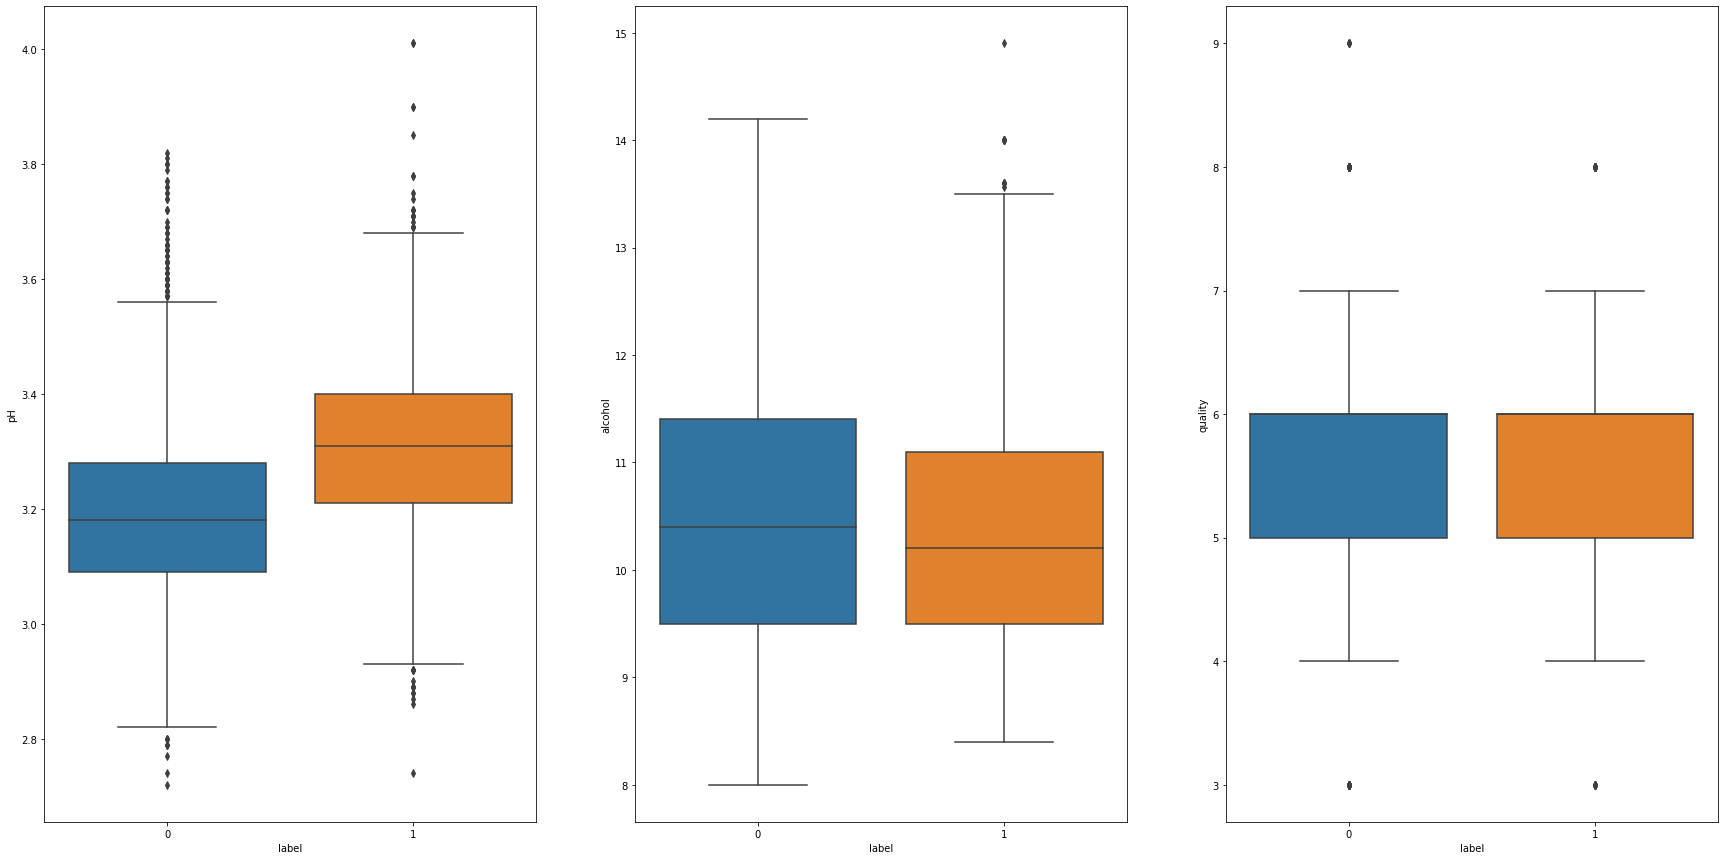

In [17]:
fig, axes = plt.subplots(1,3, figsize=(30,15))

sns.boxplot(x='label', y='pH', data=data, ax=axes[0],)
sns.boxplot(x='label', y='alcohol', data=data, ax=axes[1])
sns.boxplot(x='label', y='quality', data=data, ax=axes[2])

- red wine is slighlty high in pH value.
- both have about the same alcohol content and quality.

### Bi-variate Analysis

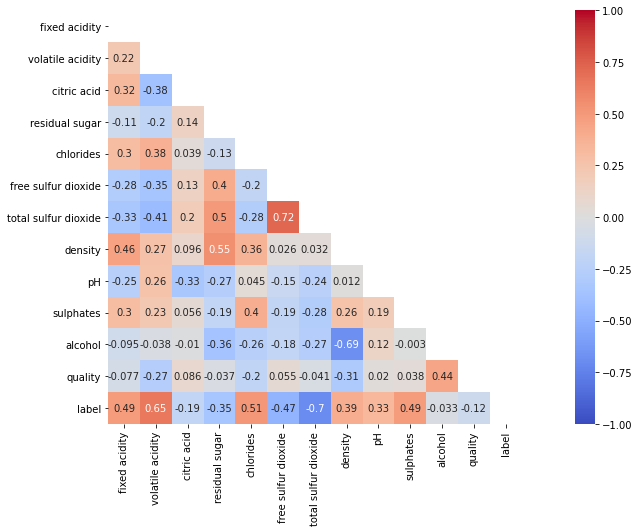

In [18]:
# correlation with each other
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(15,7.5))
sns.heatmap(data.corr(), mask=mask, annot=True,
            square=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.tight_layout()

- **free sulfur dioxide** and **total sulfur dioxide** are highly correlated.
- **density** and **alcohol** are highly correlated.
- **volatile acidity** and **total sulfur dioxide** is highly correlated with the target variable (**label**).

## Data Pre-processing

### Outliers

In [19]:
# Method 1: Remove using IQR
data1 = data.copy()

q1 = data1.quantile(0.25)
q3 = data1.quantile(0.75)

iqr = q3-q1

# remove
data1 = data1[~((data1<(q1-1.5*iqr))|(data1>(q3+1.5*iqr))).any(axis=1)]

removed = (len(data)-len(data1))/100
print(f'Remove from dataset: {removed}%')

Remove from dataset: 23.39%


In [20]:
# Method 2: Remove using Z-score
from scipy import stats

In [21]:
data2 = data.copy()

z = np.abs(stats.zscore(data2))

data2 = data2[(z<3).all(axis=1)]

removed = (len(data)-len(data2))/100
print(f'Remove from dataset: {removed}%')

Remove from dataset: 5.08%


- only 5% of the data is remove, so this dataset will be chosen.

### Split data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = data2.drop(['free sulfur dioxide','alcohol'], axis=1)

y = data2['label']

- dropping **free sulfur dioxide** and **alcohol** because they have collinearity relationship with the other features.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.3, random_state=101)

### Scale Data

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [26]:
data2_mm = data2.describe().T[['min','max']]

data2_mm['diff'] = data2_mm['max'] - data2_mm['min']

data2_mm

,min,max,diff
fixed acidity,3.90000,11.1000,7.20000
volatile acidity,0.08000,0.8300,0.75000
citric acid,0.00000,0.7400,0.74000
residual sugar,0.60000,19.5000,18.90000
chlorides,0.00900,0.1610,0.15200
free sulfur dioxide,1.00000,83.0000,82.00000
total sulfur dioxide,6.00000,282.0000,276.00000
density,0.98711,1.0026,0.01549
pH,2.74000,3.7000,0.96000
sulphates,0.22000,0.9700,0.75000


- **volatile acidity**, **citric acid**, **residual sugar**, **chlorides**, **free sulfur dioxide**, **total sulfur dioxide** and **sulphates** all have a huge difference in range.
- these features will undergo standardization.

In [27]:
# Method 1: Standardization
X_train_std = X_train.copy()
X_test_std = X_test.copy()

std_cols = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates']

for cols in std_cols:
    scale = StandardScaler().fit(X_train_std[[cols]])
    
    X_train_std[cols] = scale.transform(X_train_std[[cols]])
    
    X_test_std[cols] = scale.transform(X_test_std[[cols]])

In [28]:
# Method 2: Normalization
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

scale = MinMaxScaler().fit(X_train_norm)
    
X_train_norm[cols] = scale.transform(X_train_norm)
    
X_test_norm[cols] = scale.transform(X_test_norm)

- we shall train our models using the standard scaler dataset.

## Model Selection

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [30]:
models = []

models.append(('LogReg', LogisticRegression(random_state=101)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('RFC', RandomForestClassifier(random_state=101)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

In [31]:
# StratifiedKFold use for classification, KFold use for regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [32]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train_std, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.9990459143084441 (0.0011685125938675988)
LDA: 0.991650755767701 (0.0035797719121790413)
DTC: 1.0 (0.0)
RFC: 1.0 (0.0)
KNN: 0.9968990794408455 (0.0018632244617676982)
NB: 1.0 (0.0)
SVM: 0.9992840095465393 (0.0010936934832830394)


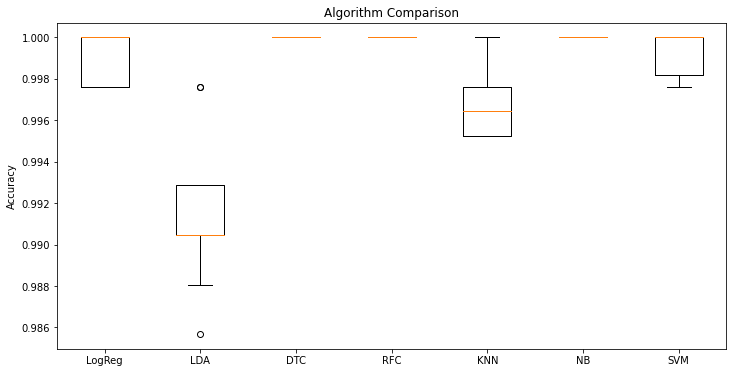

In [33]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

- DTC, RFC and NB are able to achieve a perfect classification in terms of accuracy scoring.

In [34]:
results_pred = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train_std, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

LogReg:
[[3298    0]
 [   4  890]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3298
           1       1.00      1.00      1.00       894

    accuracy                           1.00      4192
   macro avg       1.00      1.00      1.00      4192
weighted avg       1.00      1.00      1.00      4192

LDA:
[[3282   16]
 [  19  875]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3298
           1       0.98      0.98      0.98       894

    accuracy                           0.99      4192
   macro avg       0.99      0.99      0.99      4192
weighted avg       0.99      0.99      0.99      4192

DTC:
[[3298    0]
 [   0  894]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3298
           1       1.00      1.00      1.00       894

    accuracy                           1.00      4192
   macro avg       1.00      

- based on the confusion matrix and classification report, DTC, RFC and NB also achieve a perfect classification.
- RFC, NB and SVM will be chosen for further evaluation.

## Parameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [114]:
prepro = make_column_transformer((StandardScaler(), std_cols))

- use column transformer and pipeline for preprocessing to prevent leakage of data.

In [120]:
pipe1 = make_pipeline(prepro, RandomForestClassifier(random_state=101))
pipe2 = make_pipeline(prepro, GaussianNB())
pipe3 = make_pipeline(prepro, SVC(random_state=101))

### RFC

In [124]:
pipe1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__standardscaler', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_f

In [125]:
param_grid = {'randomforestclassifier__n_estimators': [1, 10, 100], 
              'randomforestclassifier__max_depth': [1, 10, 100], 
              'randomforestclassifier__min_samples_split': [0.1, 1, 10], 
              'randomforestclassifier__min_samples_leaf': [0.1, 1, 10], 
              'randomforestclassifier__max_features': [n for n in range(1,5)]}

skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)

grid_search = GridSearchCV(pipe1, param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_micro'], refit='f1_micro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'total '
   

In [126]:
grid_search.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 1,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__n_estimators': 100}

In [127]:
grid_search.best_score_

0.9916501875213093

In [130]:
rfc = grid_search

### SVM

In [132]:
pipe3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'svc', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__standardscaler', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [133]:
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
              'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(pipe3, param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_micro'], refit='f1_micro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'total '
   

In [134]:
grid_search.best_params_

{'svc__C': 1, 'svc__kernel': 'rbf'}

In [135]:
grid_search.best_score_

0.9930810319354471

In [136]:
svm = grid_search

## Evaluation

### Confusion Matrix & Classification Report 

In [140]:
chosen_models = []

chosen_models.append(('RFC', rfc.best_estimator_))
chosen_models.append(('NB', pipe2))
chosen_models.append(('SVM', svm.best_estimator_))

In [200]:
results_pred = []
names = []

for name, model in chosen_models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

RFC:
[[3285   13]
 [  22  872]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3298
           1       0.99      0.98      0.98       894

    accuracy                           0.99      4192
   macro avg       0.99      0.99      0.99      4192
weighted avg       0.99      0.99      0.99      4192

NB:
[[3225   73]
 [  27  867]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3298
           1       0.92      0.97      0.95       894

    accuracy                           0.98      4192
   macro avg       0.96      0.97      0.97      4192
weighted avg       0.98      0.98      0.98      4192

SVM:
[[3283   15]
 [  14  880]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3298
           1       0.98      0.98      0.98       894

    accuracy                           0.99      4192
   macro avg       0.99      0.99

## Precision-Recall Curve

In [191]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [143]:
# RFC & NB
rfc_prob = cross_val_predict(rfc.best_estimator_, X_train, y_train, cv=skfold ,
                                    method="predict_proba")

rfc_scores = rfc_prob[:, 1]                                                    # score = proba of positive class

nb_prob = cross_val_predict(pipe2, X_train, y_train, cv=skfold ,
                              method="predict_proba")

nb_scores = nb_prob[:, 1]

In [144]:
# SVM
svm_scores = cross_val_predict(svm.best_estimator_, X_train, y_train, cv=skfold,
                               method="decision_function")

In [147]:
rfc_precisions, rfc_recalls, rfc_thresholds = precision_recall_curve(y_train, rfc_scores)

nb_precisions, nb_recalls, nb_thresholds = precision_recall_curve(y_train, nb_scores)

svm_precisions, svm_recalls, svm_thresholds = precision_recall_curve(y_train, svm_scores)

In [185]:
def plot_precision_vs_recall(precisions, recalls, color, model_name):
    plt.plot(recalls, precisions, color, label=model_name, linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

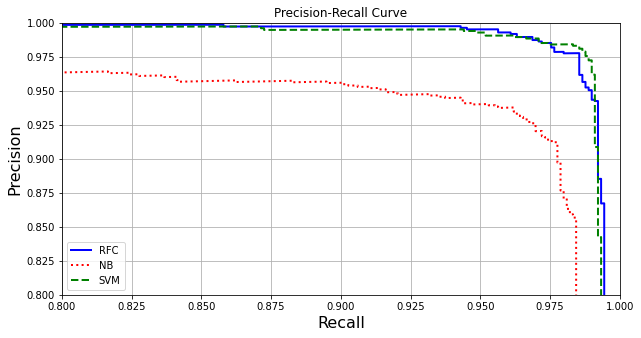

In [187]:
plt.figure(figsize=(10, 5))

plot_precision_vs_recall(rfc_precisions, rfc_recalls, 'b-', 'RFC')
plot_precision_vs_recall(nb_precisions, nb_recalls, 'r:', 'NB')
plot_precision_vs_recall(svm_precisions, svm_recalls, 'g--', 'SVM')

plt.title('Precision-Recall Curve')
plt.legend()

### ROC Curve

In [172]:
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_train, rfc_scores)

nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_train, nb_scores)

svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_train, svm_scores)

In [173]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')                            # dashed diagonal
    plt.axis([0, 1, 0, 1])                                  
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

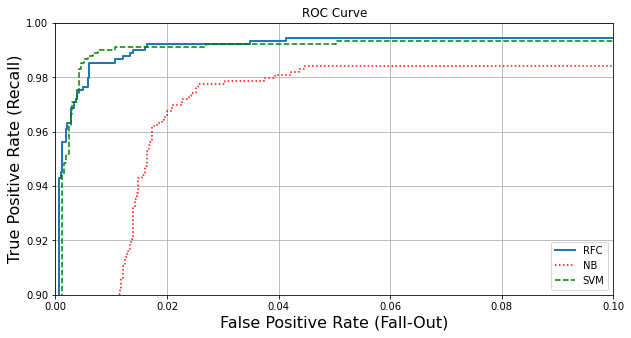

In [195]:
plt.figure(figsize=(10,5))  

plot_roc_curve(rfc_fpr, rfc_tpr, 'RFC')
plt.plot(nb_fpr, nb_tpr, 'r:', label='NB')
plt.plot(svm_fpr, svm_tpr, 'g--', label='SVM')
plt.axis([0, 0.1, 0.9, 1])

plt.title('ROC Curve')
plt.legend()

In [194]:
print('roc score:')
print(f'   RFC = {roc_auc_score(y_train, rfc_scores)}')
print(f'   NB  = {roc_auc_score(y_train, nb_scores)}')
print(f'   SVM = {roc_auc_score(y_train, svm_scores)}')

roc score:
   RFC = 0.9958128307712762
   NB  = 0.9877618867376744
   SVM = 0.9959015225823256


- based on all the results given, either RFC or SVM can be chosen.

## Final Model

In [196]:
rfc.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'total sulfur dioxide',
                                                   'sulphates'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_features=1,
                                        min_samples_split=10,
                                        random_state=101))])

In [182]:
final_model = rfc.best_estimator_

final_model.fit(X_train, y_train)

pred = final_model.predict(X_test)

print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')

[[1411    3]
 [  12  371]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1414
           1       0.99      0.97      0.98       383

    accuracy                           0.99      1797
   macro avg       0.99      0.98      0.99      1797
weighted avg       0.99      0.99      0.99      1797



- based on the confusion matrix, the model only misclassified 3 white wine as red and 12 red wine as white.